# Text Processing and Text Analytics

A brief introduction to Text Processing and Analysis using Python.

## 1. Collect Data

#### 1.1 Use existing datasets

1. directly download (https://github.com/caesar0301/awesome-public-datasets#natural-language)
        
2. via API
    
    
#### 1.2 Scrape website

Web scraping is the term for using a program to download and process content from the Web. (https://automatetheboringstuff.com/chapter11/)

In [1]:
# An example of scraping top 250 movies from IMDB website

import urllib.request
import csv
from bs4 import BeautifulSoup

html = urllib.request.urlopen('http://www.imdb.com/chart/top')
soup = BeautifulSoup(html, "lxml")
movie_table_soup = soup.find('tbody', attrs={'class': 'lister-list'})
movie_name_list = []

for movie_row in movie_table_soup.find_all('tr'):
    detail = movie_row.find('td', attrs={'class': 'titleColumn'})
    movie_name = detail.find('a').string
    year = detail.find( 'span', attrs={'class': 'secondaryInfo'}).string.strip('()')

    movie_name_list.append((movie_name, year))

movie_name_list    

[('The Shawshank Redemption', '1994'),
 ('The Godfather', '1972'),
 ('The Godfather: Part II', '1974'),
 ('The Dark Knight', '2008'),
 ('12 Angry Men', '1957'),
 ("Schindler's List", '1993'),
 ('Pulp Fiction', '1994'),
 ('The Lord of the Rings: The Return of the King', '2003'),
 ('The Good, the Bad and the Ugly', '1966'),
 ('Fight Club', '1999'),
 ('The Lord of the Rings: The Fellowship of the Ring', '2001'),
 ('Forrest Gump', '1994'),
 ('Star Wars: Episode V - The Empire Strikes Back', '1980'),
 ('Inception', '2010'),
 ('The Lord of the Rings: The Two Towers', '2002'),
 ("One Flew Over the Cuckoo's Nest", '1975'),
 ('Goodfellas', '1990'),
 ('The Matrix', '1999'),
 ('Seven Samurai', '1954'),
 ('Star Wars: Episode IV - A New Hope', '1977'),
 ('City of God', '2002'),
 ('Se7en', '1995'),
 ('The Silence of the Lambs', '1991'),
 ("It's a Wonderful Life", '1946'),
 ('Life Is Beautiful', '1997'),
 ('The Usual Suspects', '1995'),
 ('Léon: The Professional', '1994'),
 ('Saving Private Ryan', '1

## 2. Pre-process Data

#### 2.1 Remove unneeded data

1. remove HTML tags

2. remove other unneeded parts
         
    

In [2]:
# Example of removing HTML tags

raw_html = """<div>
<h1>Babson College</h1>
<p>Babson College is the educator for Entrepreneurship of All Kinds. Take part in a living, learning laboratory to prepare yourself for the future of business.</p>
<a href="http:\\www.babson.edu">www.babson.edu</a>
</div>"""

from IPython.core.display import display, HTML
display(HTML(raw_html))

# In web browser, the raw_html should be displayed as below


</br>

In [3]:
# Get clean text

clean_text = BeautifulSoup(raw_html, "lxml").text

print(clean_text)


Babson College
Babson College is the educator for Entrepreneurship of All Kinds. Take part in a living, learning laboratory to prepare yourself for the future of business.
www.babson.edu




#### 2.2 Deal with encoding issues (for foreign languages)
     

#### 2.3 Tokenize document(s)
For our language processing, we want to break up the string into words and punctuation. This step is called tokenization, and it produces our familiar structure, a list of words and punctuation.    
     

In [4]:
# Example of tokenization

Text number 2554 at http://www.gutenberg.org/catalog/ is an English translation of *Crime and Punishment*, and we can access it as follows.

In [5]:
from nltk import word_tokenize

from urllib import request
url = "http://www.gutenberg.org/files/2554/2554-0.txt"
response = request.urlopen(url)
raw = response.read().decode('utf8')
len(raw)

1176965

In [6]:
tokens = word_tokenize(raw)
type(tokens)

list

In [7]:
len(tokens)

257726

In [8]:
tokens[:12]

['\ufeffThe',
 'Project',
 'Gutenberg',
 'EBook',
 'of',
 'Crime',
 'and',
 'Punishment',
 ',',
 'by',
 'Fyodor',
 'Dostoevsky']

#### 2.4 POS tag words (https://en.wikipedia.org/wiki/Part-of-speech_tagging)

- convert to lower case words

In [9]:
tokens[2].lower()

'gutenberg'

- remove punctuation

In [10]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


- spellcheck (<http://pythonhosted.org/pyenchant/>)
- remove stopwords (<http://stackoverflow.com/questions/19130512/stopword-removal-with-nltk>)
- lemmatize/stem words (<http://www.nltk.org/api/nltk.stem.html>)

In [11]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
print(wnl.lemmatize('dogs'))

dog


In [12]:
print(wnl.lemmatize('churches'))

church


In [13]:
print(wnl.lemmatize('wolves'))

wolf


In [14]:
print(wnl.lemmatize('alumni'))


alumnus


## 3. Bag-of-words 

https://en.wikipedia.org/wiki/Bag-of-words_model

The bag-of-words model is a simplifying representation used in natural language processing and information retrieval (IR). In this model, a text (such as a sentence or a document) is represented as the bag (multiset) of its words, disregarding grammar and even word order but keeping multiplicity. The bag-of-words model has also been used for computer vision.

The bag-of-words model is commonly used in methods of document classification where the (frequency of) occurrence of each word is used as a feature for training a classifier.

- scikit-learn (http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction
- NLTK (http://www.nltk.org/book/ch06.html)


## 4. TF-IDF

In information retrieval, tf–idf, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. https://en.wikipedia.org/wiki/Tf%E2%80%93idf

- scikit-learn (http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

text1 = 'I love reading books.'
text2 = 'Those are books about Babson. I love Babson College'
text3 = 'I love reading.'

vectorizer = TfidfVectorizer(stop_words= 'english') 

tfidf = vectorizer.fit_transform([text1, text2])

In [16]:
vectorizer.get_feature_names()

['babson', 'books', 'college', 'love', 'reading']

In [17]:
print(tfidf)

  (0, 3)	0.501548907094
  (0, 4)	0.704909488931
  (0, 1)	0.501548907094
  (1, 3)	0.290170208991
  (1, 1)	0.290170208991
  (1, 0)	0.8156482083
  (1, 2)	0.40782410415


## 5. Training models (http://scikit-learn.org/stable/supervised_learning.html)

1. Classification
2. Sentiment analysis
3. Topic Extraction
    - topics_extraction_with_nmf (http://scikit-learn.org/0.16/auto_examples/applications/topics_extraction_with_nmf.html)
    - LDA (http://radimrehurek.com/gensim/wiki.html#latent-dirichlet-allocation)
    - word2vec (http://radimrehurek.com/gensim/models/word2vec.html)
4. ...


In [18]:
# Example of Simlarity and Sentiment Analysis


import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def similarity(text1, text2):
    '''
    text1, text2: two strings
    return: similarity score of the two strings
    '''
    #convert all the words of two books to a vector, except for the stop words
    vectorizer = TfidfVectorizer(stop_words= 'english')    
    tfidf = vectorizer.fit_transform([text1, text2])
    #multipe the vector by its transpose to get the Similarity score
    return ((tfidf * tfidf.T).A)[0,1]

def sentiment(text):
    score = SentimentIntensityAnalyzer().polarity_scores(text)
    #return the polarity score of the text
    return score


text1 = 'This book is great.'
text2 = 'This is a great book.'
text3 = 'This book is disgusting'


In [19]:
similarity(text1,text2)

0.99999999999999978

In [20]:
similarity(text1,text3)

0.3360969272762574

In [21]:
sentiment(text1)

{'compound': 0.6249, 'neg': 0.0, 'neu': 0.423, 'pos': 0.577}

In [22]:
sentiment(text3)

{'compound': -0.5267, 'neg': 0.531, 'neu': 0.469, 'pos': 0.0}

## 6. Visualization

- Matplotlib (http://matplotlib.org/)
- Word cloud
- ...

You need a Python library <code>wordcloud</code>, which you can install by running the following command in **Command Prompt**:

```
pip install wordcloud
```

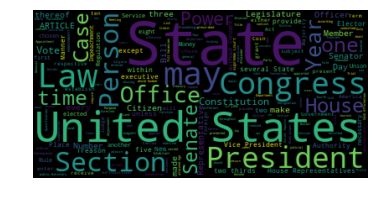

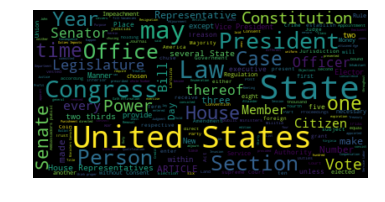

In [23]:
# Example of word cloud generated from the Constitution

from wordcloud import WordCloud

# Read the whole text.
text = open('data/constitution.txt').read()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
